<a href="https://colab.research.google.com/github/ipoyjob/KMeansClusteringFromScratch/blob/main/SourceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from math import ceil
import random as rd
import copy
from copy import deepcopy

# Data Set

In [ ]:
df = pd.read_csv('kendaraan_train.csv')

In [ ]:
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


# PREPROCESSING

### DROP COLUMN

drop column pada id, karena column id tidak terlalu penting (sudah ada index). Selain itu, column tertarik di drop karena pada tugas ini, kita tidak diperbolehkan menggunakan label yang ada

In [ ]:
df=df.drop(['id','Tertarik'],axis=1)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


### CHECK NaN

dilakukan pengecekan nilai null untuk setiap column dengan menggunakan isnull

In [ ]:
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

### Handling Missing Value and object type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), object(3)
memory usage: 21.8+ MB


##### Change into numerical

mengubah data kategotik menjadi numerik

In [ ]:
#Jenis_Kelamin
replace_values = {'Wanita' : 0, 'Pria' : 1} 
df = df.replace({"Jenis_Kelamin": replace_values})

#umur kendaraan
replace_values = {'< 1 Tahun' : 0, '1-2 Tahun' : 1, '> 2 Tahun' : 2 }   
df = df.replace({"Umur_Kendaraan": replace_values})

#Kendaraan_Rusak
replace_values = {'Pernah' : 1, 'Tidak' : 0} 
df = df.replace({"Kendaraan_Rusak": replace_values}) 

df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


###### Missing value

mencari nilai skewness untuk menentukan apakah missing value akan di assign oleh median atau mean

In [ ]:
df.skew(axis=0, skipna=True)

Jenis_Kelamin        -0.162403
Umur                  0.671077
SIM                 -21.489056
Kode_Daerah          -0.116322
Sudah_Asuransi        0.165452
Umur_Kendaraan        0.252693
Kendaraan_Rusak      -0.019166
Premi                 1.656493
Kanal_Penjualan      -0.899909
Lama_Berlangganan     0.003858
dtype: float64

In [ ]:
#Tidak mempertimbangkan skewness (value column ini menggunakan mode(karena pilihan value terbatas))
MODE_Jenis_Kelamin = df['Jenis_Kelamin'].mode()[0]
df['Jenis_Kelamin'].replace(np.nan, MODE_Jenis_Kelamin, inplace=True)

MODE_SIM = df['SIM'].mode()[0]
df['SIM'].replace(np.nan, MODE_SIM, inplace=True)

MODE_SA = df['Sudah_Asuransi'].mode()[0]
df['Sudah_Asuransi'].replace(np.nan, MODE_SA, inplace=True)

MODE_UK = df['Umur_Kendaraan'].mode()[0]
df['Umur_Kendaraan'].replace(np.nan, MODE_UK, inplace=True)

MODE_KR = df['Kendaraan_Rusak'].mode()[0]
df['Kendaraan_Rusak'].replace(np.nan, MODE_KR, inplace=True)

#mean (diantara -1 sampai 1)
df['Umur'].fillna(df['Umur'].mean(),inplace=True)
df['Kode_Daerah'].fillna(df['Kode_Daerah'].mean(),inplace=True)
df['Kanal_Penjualan'].fillna(df['Kanal_Penjualan'].mean(),inplace=True)
df['Lama_Berlangganan'].fillna(df['Lama_Berlangganan'].mean(),inplace=True)

#median
df['Premi'].fillna(df['Premi'].median(),inplace=True)

dilakukan pengecekan kembali apakah masih ada column yg memiliki index value NaN

In [ ]:
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

## Check Outliner

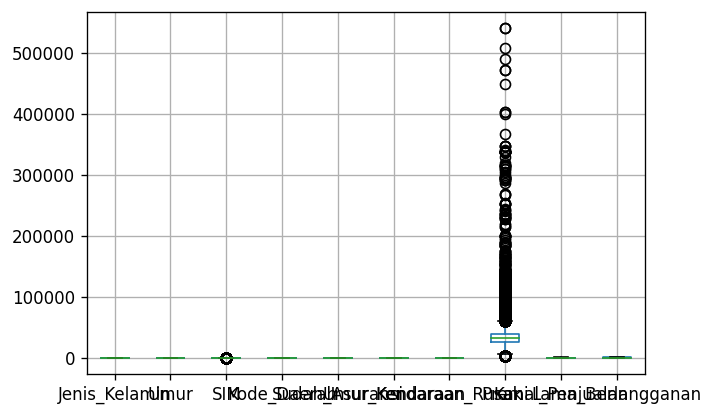

In [ ]:
pd.DataFrame.boxplot(df)

dari hasil boxplot, column premi memiliki outliner yang banyak

### handling outliner

menghitung jarak interquartile

In [ ]:
def interquartile(df,x):
  q1 = (df[x]).quantile(0.25)
  q3 = (df[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

menggantikan value outliners dengan hasil dari perhitungan jarak interquartile

In [ ]:
def sub_outliners(df,x,maximum,minimum):
  more_than = (df[x] > maximum)
  less_than = (df[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df[x] = df[x].mask(more_than, maximum,axis=0)
  df[x] = df[x].mask(less_than, minimum,axis=0)
  return df

In [ ]:
maximum,minimum = interquartile(df,'Premi')
df = sub_outliners(df,'Premi',maximum,minimum)

more_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool  | less_than:  0         False
1         False
2         False
3          True
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool


In [ ]:
maximum,minimum = interquartile(df,'SIM')
df = sub_outliners(df,'SIM',maximum,minimum)

more_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: SIM, Length: 285831, dtype: bool  | less_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: SIM, Length: 285831, dtype: bool


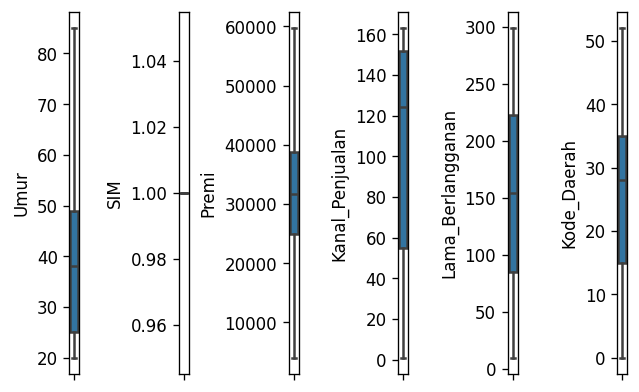

In [ ]:
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df["Umur"], ax=a[0])
sns.boxplot(y=df["SIM"], ax=a[1])
sns.boxplot(y=df["Premi"], ax=a[2])
sns.boxplot(y=df["Kanal_Penjualan"], ax=a[3])
sns.boxplot(y=df["Lama_Berlangganan"], ax=a[4])
sns.boxplot(y=df["Kode_Daerah"], ax=a[5])


plt.subplots_adjust(wspace=10)

## SCALLING

In [ ]:
scale = StandardScaler()
scale.fit(df)
temp =scale.transform(df)
df_baru = pd.DataFrame(temp, index=df.index, columns=df.columns)

In [ ]:
df_baru

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.136622,-0.584495,0.0,0.510544,1.137496,-1.124498,-1.060576,-0.161443,0.756749,-0.701861
1,0.879800,0.605070,0.0,0.975056,-0.879124,2.449376,0.942884,-0.314798,-1.571509,0.045500
2,0.879800,-1.179278,0.0,1.516987,1.137496,-1.124498,-1.060576,0.162192,0.908180,-0.432321
3,-1.136622,1.265939,0.0,1.671825,-0.879124,0.662439,-1.060576,-1.810853,0.226739,-1.118423
4,0.879800,0.737244,0.0,0.665382,-0.879124,2.449376,0.942884,0.308323,-0.454702,0.486565
...,...,...,...,...,...,...,...,...,...,...
285826,-1.136622,-1.047104,0.0,-1.734597,1.137496,-1.124498,-1.060576,-0.301864,0.756749,0.768357
285827,-1.136622,-1.179278,0.0,1.516987,1.137496,-1.124498,-1.060576,0.984558,0.756749,-1.277697
285828,-1.136622,-1.047104,0.0,1.826662,1.137496,-1.124498,-1.060576,1.333029,0.756749,0.878623
285829,0.879800,1.926809,0.0,-1.502341,1.137496,0.662439,-1.060576,0.008768,0.226739,1.417703


In [ ]:
df_baru['Kendaraan_Rusak'].value_counts()

 0.942884    151311
-1.060576    134520
Name: Kendaraan_Rusak, dtype: int64

In [ ]:
df_scall=df_baru.drop(['SIM','Jenis_Kelamin','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak'],axis=1)
df_scall

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-0.584495,0.510544,-0.161443,0.756749,-0.701861
1,0.605070,0.975056,-0.314798,-1.571509,0.045500
2,-1.179278,1.516987,0.162192,0.908180,-0.432321
3,1.265939,1.671825,-1.810853,0.226739,-1.118423
4,0.737244,0.665382,0.308323,-0.454702,0.486565
...,...,...,...,...,...
285826,-1.047104,-1.734597,-0.301864,0.756749,0.768357
285827,-1.179278,1.516987,0.984558,0.756749,-1.277697
285828,-1.047104,1.826662,1.333029,0.756749,0.878623
285829,1.926809,-1.502341,0.008768,0.226739,1.417703


terjadi drop untuk beberapa atribut yang sebelumnya merupakan atribut kategorik, hal ini dilakukan untuk menghindari noise data saat clustering nanti

## Selected feature

menggunakan bantuan PCA dan memasukannya ke dalam data frame yang baru, yang hanya akan berisikan column yang ditinjau untuk proses clustering

In [ ]:
test = PCA(n_components=2)
df_cluster = test.fit_transform(df_scall)
df_cluster = pd.DataFrame(data = df_cluster, columns = ['x', 'y'])
df_cluster

,x,y
0,-0.909167,-0.649934
1,1.528810,-0.973593
2,-1.259257,-1.198927
3,0.489849,-2.650933
4,0.945500,-0.288408
...,...,...
285826,-1.466852,1.494365
285827,-0.982500,-0.983842
285828,-0.792372,-0.506908
285829,1.020152,1.494124


In [ ]:
arrayScal = np.array(list(zip(df_cluster['x'], df_cluster['y'])))
print(arrayScal)

[[-0.90916734 -0.64993359]
 [ 1.52881008 -0.97359252]
 [-1.25925687 -1.1989271 ]
 ...
 [-0.79237159 -0.50690808]
 [ 1.02015216  1.49412353]
 [ 1.50667126 -0.24562208]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


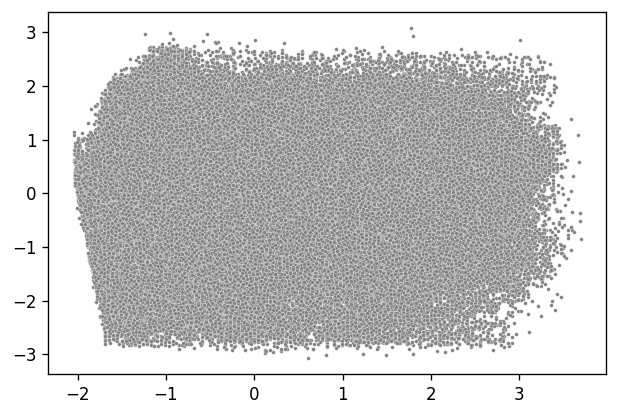

In [ ]:
x=arrayScal[:,0]
y=arrayScal[:,1]
sns.scatterplot(x, y, s=5, color='grey')

Text(0, 0.5, 'y')

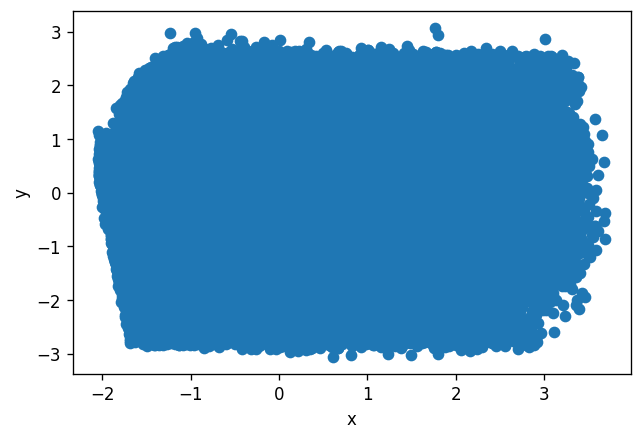

In [ ]:
plt.scatter(df_cluster['x'], df_cluster['y'])
plt.xlabel('x')
plt.ylabel('y')

# PEMODELAN

In [ ]:
def euclid(a, b, ax=1):
    kurang = a-b
    result_euclid = np.linalg.norm(kurang, axis=ax)
    return result_euclid

In [ ]:
k = 2
def centro(arrayScal,k):
  min = np.min(arrayScal)
  max = np.max(arrayScal)

  centro1 = np.random.randint(min, max, size=k)
  centro2 = np.random.randint(min, max, size=k)
  centroid = np.array(list(zip(centro1, centro2)))
  return centroid

In [ ]:
arrCluster = np.zeros(len(arrayScal))
centroid = centro(arrayScal,k)
arrC = np.zeros(centroid.shape)
titik = []
temp = []

mark = euclid(centroid, arrC, None)

while mark != 0:
    for i in range(len(arrayScal)):
        jarak = euclid(arrayScal[i], centroid) 
        cluster = np.argmin(jarak) 
        arrCluster[i] = cluster 
    arrC = deepcopy(centroid) 


    for i in range(k): 
        titik = [arrayScal[j] for j in range(len(arrayScal)) if arrCluster[j] == i] 
        centroid[i] = np.mean(titik, axis=0) 
        temp.append(arrCluster)

    mark = euclid(centroid, arrC, None)

<function matplotlib.pyplot.show>

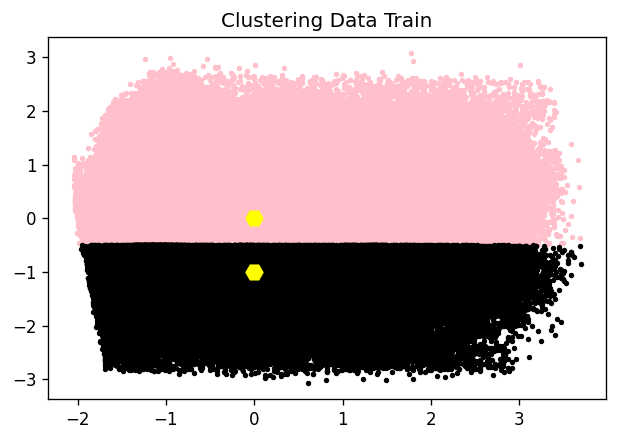

In [ ]:
fig, ax = plt.subplots()
warna = ['pink', 'black', 'green', 'gold', 'silver', 'navy', 'red']

for i in range(k):
        titik = np.array([arrayScal[j] for j in range(len(arrayScal)) if arrCluster[j] == i])
        x = titik[:, 0]
        y = titik[:, 1]
        ax.scatter(x, y, s=5, c=warna[i])

clusterx = centroid[:, 0]
clustery = centroid[:, 1]        
ax.scatter(clusterx, clustery, marker='H', s=100, color='yellow')
plt.title("Clustering Data Train")
plt.show

In [ ]:
print(centroid)

[[ 0  0]
 [ 0 -1]]


In [ ]:
df["Cluster"] = arrCluster
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Cluster
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,1.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,1.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,1.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,4055.0,124.0,63.0,1.0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,1.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,1.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0.0


In [ ]:
df['Cluster'].value_counts()

0.0    199110
1.0     86721
Name: Cluster, dtype: int64

# EVAL

In [ ]:
df_cluster

,x,y
0,-0.909167,-0.649934
1,1.528810,-0.973593
2,-1.259257,-1.198927
3,0.489849,-2.650933
4,0.945500,-0.288408
...,...,...
285826,-1.466852,1.494365
285827,-0.982500,-0.983842
285828,-0.792372,-0.506908
285829,1.020152,1.494124


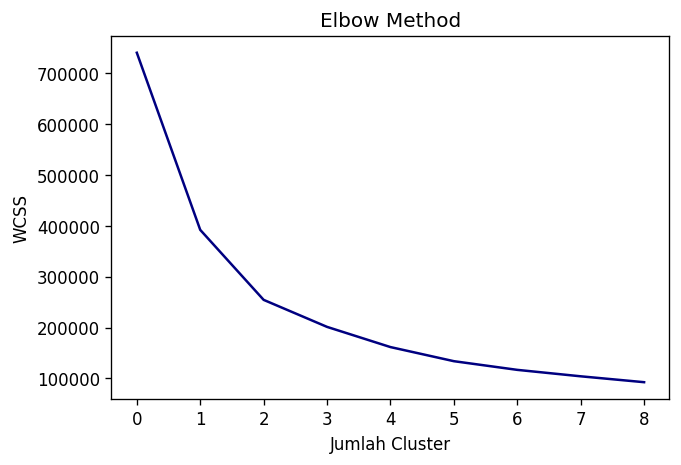

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for n in range(1,10):
    km = KMeans(n_clusters= n, init='k-means++', random_state=50)
    km.fit(df_cluster)
    wcss.append(km.inertia_)
plt.plot(wcss,color= 'navy')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# OUTPUT

In [ ]:
# menyimpan data ke dalam excel
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df.sort_values(by='Cluster', ascending=False).to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
